## Introduction and Exploratory Data Analysis

Read in the Data:

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
bank = pd.read_csv('Bank.csv')
bank.head()

,Employee,EducLev,JobGrade,YrHired,YrBorn,Gender,YrsPrior,PCJob,Salary,Mgmt
0,1,3,1,92,69,Male,1,No,32.0,Non-Mgmt
1,2,1,1,81,57,Female,1,No,39.1,Non-Mgmt
2,3,1,1,83,60,Female,0,No,33.2,Non-Mgmt
3,4,2,1,87,55,Female,7,No,30.6,Non-Mgmt
4,5,3,1,92,67,Male,0,No,29.0,Non-Mgmt


**Data Properties:**

In [3]:
bank.shape

(208, 10)

The describe method gives you a good overview of the data, some basic stats that paint a picture of what the data and its distribution looks like.

In [4]:
bank.describe()

,Employee,EducLev,JobGrade,YrHired,YrBorn,YrsPrior,Salary
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,104.500000,3.158654,2.759615,85.326923,54.605769,2.375000,39.921923
std,60.188592,1.467464,1.566529,6.987832,10.318988,3.135237,11.256154
min,1.000000,1.000000,1.000000,56.000000,30.000000,0.000000,26.700000
25%,52.750000,2.000000,1.000000,82.000000,47.750000,0.000000,33.000000
50%,104.500000,3.000000,3.000000,87.000000,56.500000,1.000000,37.000000
75%,156.250000,5.000000,4.000000,90.000000,63.000000,4.000000,44.000000
max,208.000000,5.000000,6.000000,93.000000,73.000000,18.000000,97.000000


C:\Users\blais\AppData\Local\Temp\ipykernel_13608\3572403641.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  bank.hist(ax=ax);


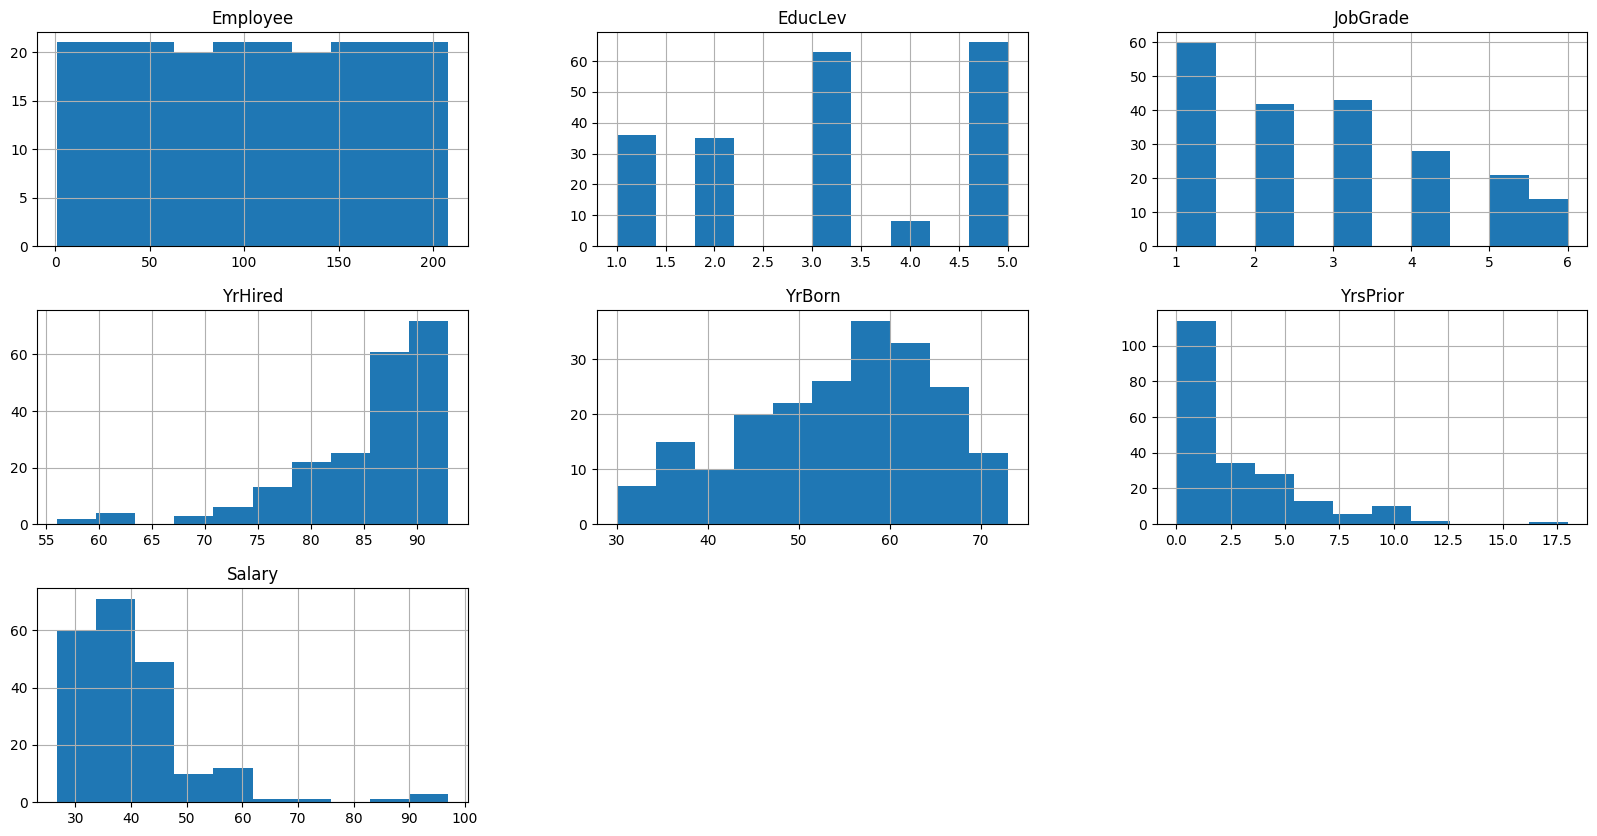

In [8]:
fig, ax = plt.subplots(figsize=(20,10))
bank.hist(ax=ax);

The describe method gives us some overview of the data, and the hist method plots the distribution of the numerical attributes in the data. To visually show us how it is distributed. This is important when going ahead to build ML models. 

The info method gives us some more information on the types of data under each attribute, and also information on any missing data attributes that might be in the data:

In [9]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Employee  208 non-null    int64  
 1   EducLev   208 non-null    int64  
 2   JobGrade  208 non-null    int64  
 3   YrHired   208 non-null    int64  
 4   YrBorn    208 non-null    int64  
 5   Gender    208 non-null    object 
 6   YrsPrior  208 non-null    int64  
 7   PCJob     208 non-null    object 
 8   Salary    208 non-null    float64
 9   Mgmt      208 non-null    object 
dtypes: float64(1), int64(6), object(3)
memory usage: 16.4+ KB


From the above description, we have no missing values in our dataset. Also, we have some text values, i.e. Gender, PCJob, and Mgmt.

Next, we convert some finite text types (object types), to the category data type. The category type is more memory efficient, especially for string types or for datatypes with finite values.

In [10]:
bank['Gender'].value_counts()

Gender
Female    140
Male       68
Name: count, dtype: int64

In [11]:
bank['PCJob'].value_counts()

PCJob
No     189
Yes     19
Name: count, dtype: int64

In [12]:
bank['Gender'] = bank['Gender'].astype('category')
bank['PCJob'] = bank['PCJob'].astype('category')

We now check on our category columns, by including the include method, we get to get some description for only our categorical data:

In [13]:
bank.describe(include='category')

,Gender,PCJob
count,208,208
unique,2,2
top,Female,No
freq,140,189


## Basic Visualization:

Here, we show the most common types of distributional plots and their use on the data: i.e. histograms and boxplots.

We can use basic functions to perform some computations on the 

In [15]:
bank['Salary'].agg(['min','mean','median','max'])

min       26.700000
mean      39.921923
median    37.000000
max       97.000000
Name: Salary, dtype: float64

For distributions: histograms, boxplots and density plots.

In [16]:
import seaborn as sns

We will use seaborn for the distribution plots. The syntax for seaborn is closer to R than python. 

<Axes: xlabel='Salary', ylabel='Count'>

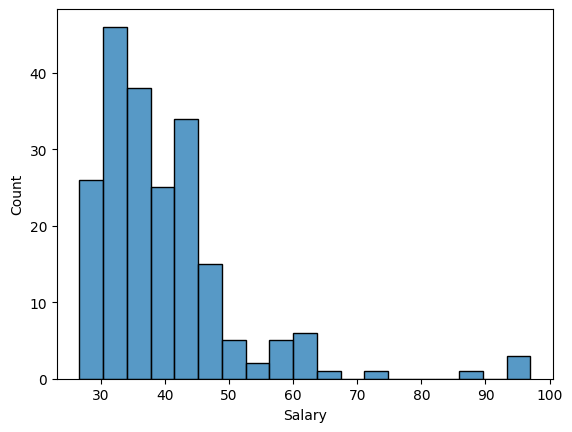

In [17]:
# visualising the distribution of salary:
sns.histplot(x=bank['Salary'])

<Axes: ylabel='Frequency'>

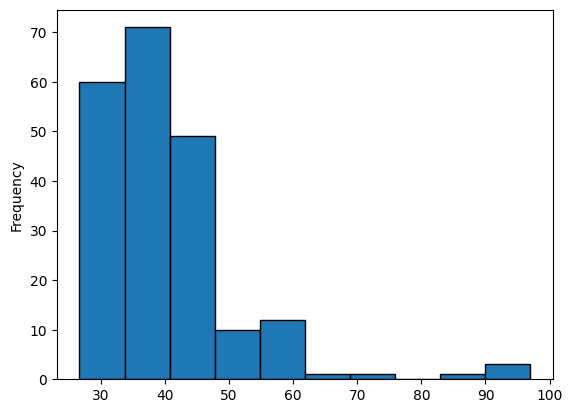

In [19]:
bank['Salary'].plot(kind='hist',edgecolor='black')

The point of a histogram is to get a rough sense of the shape of the distribution of the variable. We know the salary is skewed to the right. But with seaborn, we can also adjust the number of bins.

<Axes: xlabel='Salary', ylabel='Count'>

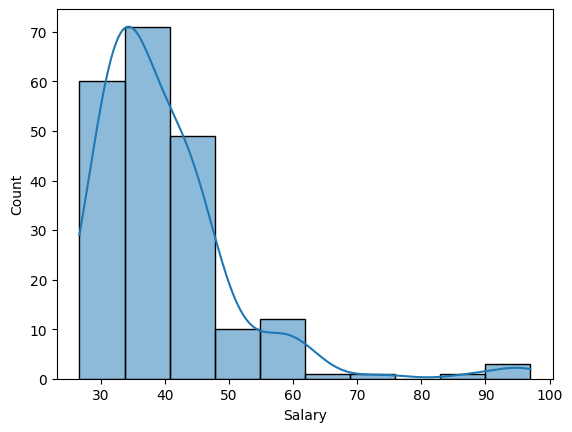

In [21]:
sns.histplot(x=bank['Salary'],bins=10,kde=True)

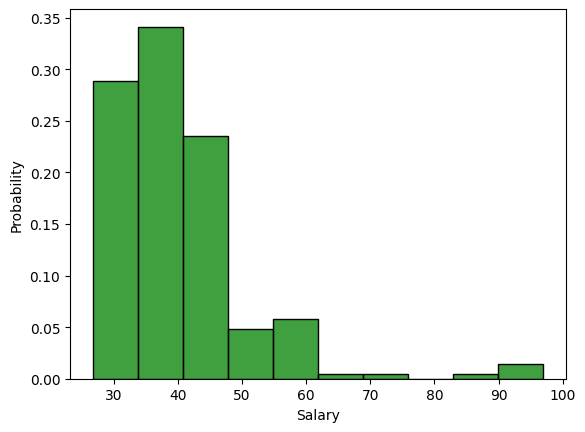

In [22]:
sns.histplot(x=bank['Salary'],
             bins=10,kde=False,
             stat='probability',
             color='green');

Using boxplots to visualize distributions:

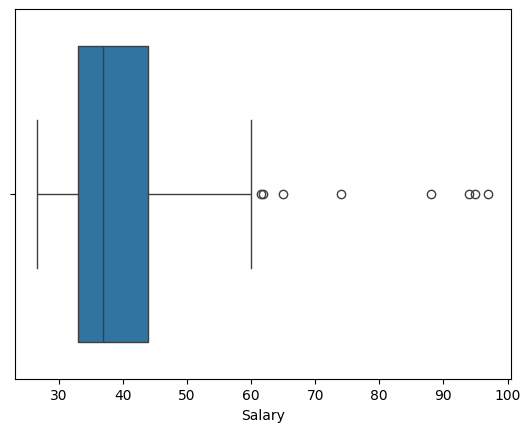

In [23]:
# boxplots in seaborn are simple:
sns.boxplot(x=bank['Salary']);

for a vertical orientation, we simply need to plot the data as the y variable instead of the x variable above. Also note that seaborn does not provide an indicator of the mean by default. Skewed data pulls the mean away from the median and it is important to visualise and compare both of them:

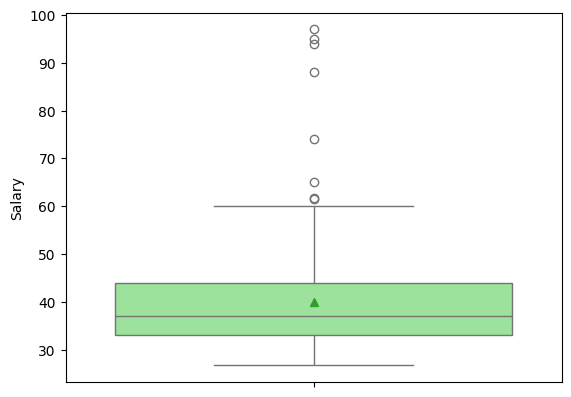

In [24]:
sns.boxplot(y=bank['Salary'],color='lightgreen',showmeans=True);